In [263]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from google.colab import drive
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.tsa.api as smf
import seaborn as sns
import ipywidgets as widgets
from IPython.display import display
drive.mount( '/gdrive')

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


In [264]:
wasterWaterURL = "/gdrive/My Drive/Wastewater_Data.csv"
df = pd.read_csv(wasterWaterURL, index_col=0, parse_dates=True)

In [265]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6574 entries, 2001-01-01 to 2018-12-31
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Total Solids  6567 non-null   float64
 1   SS            6564 non-null   float64
 2   BOD5          6388 non-null   object 
 3   NH3           6565 non-null   float64
 4   Org-N         6565 non-null   float64
 5   P-TOT         6568 non-null   object 
 6   SO4           6574 non-null   object 
 7   TKN           6567 non-null   float64
 8   PRCP_NOOA     6574 non-null   float64
dtypes: float64(6), object(3)
memory usage: 513.6+ KB


In [266]:
df.isnull().sum()

Total Solids      7
SS               10
BOD5            186
NH3               9
Org-N             9
P-TOT             6
SO4               0
TKN               7
PRCP_NOOA         0
dtype: int64

In [267]:
#check NaN lines
df[df.isnull().any(axis=1)]

,Total Solids,SS,BOD5,NH3,Org-N,P-TOT,SO4,TKN,PRCP_NOOA
Date,,,,,,,,,
2003-11-05,410.0,47.0,NaN,3.33,4.4,1.12,,7.70,0.00
2003-12-10,429.0,68.0,NaN,4.05,4.8,1.32,,8.90,0.56
2004-03-06,822.0,48.0,NaN,3.26,6.0,1.69,,9.20,0.00
2004-03-30,NaN,NaN,NaN,NaN,NaN,,72,NaN,0.00
2004-05-23,611.0,40.0,NaN,2.62,3.4,0.75,,6.00,0.00
...,...,...,...,...,...,...,...,...,...
2018-10-17,936.0,136.0,NaN,17.30,8.2,3.87,,25.51,0.00
2018-10-18,958.0,194.0,NaN,17.87,10.0,4.08,,27.87,0.00
2018-11-09,812.0,116.0,NaN,14.38,6.8,3.36,,21.18,0.13


In [268]:
 df.isnull().describe

<bound method NDFrame.describe of             Total Solids     SS   BOD5    NH3  ...  P-TOT    SO4    TKN  PRCP_NOOA
Date                                           ...                                
2001-01-01         False  False  False  False  ...  False  False  False      False
2001-01-02         False  False  False  False  ...  False  False  False      False
2001-01-03         False  False  False  False  ...  False  False  False      False
2001-01-04         False  False  False  False  ...  False  False  False      False
2001-01-05         False  False  False  False  ...  False  False  False      False
...                  ...    ...    ...    ...  ...    ...    ...    ...        ...
2018-12-27         False  False  False  False  ...  False  False  False      False
2018-12-28         False  False  False  False  ...  False  False  False      False
2018-12-29         False  False  False  False  ...  False  False  False      False
2018-12-30         False  False  False  False  ...  F

In [269]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6574 entries, 2001-01-01 to 2018-12-31
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Total Solids  6567 non-null   float64
 1   SS            6564 non-null   float64
 2   BOD5          6388 non-null   object 
 3   NH3           6565 non-null   float64
 4   Org-N         6565 non-null   float64
 5   P-TOT         6568 non-null   object 
 6   SO4           6574 non-null   object 
 7   TKN           6567 non-null   float64
 8   PRCP_NOOA     6574 non-null   float64
dtypes: float64(6), object(3)
memory usage: 513.6+ KB


In [270]:
#change object to flaot
df[['BOD5', 'P-TOT', 'SO4']] = df[['BOD5', 'P-TOT', 'SO4']].apply(pd.to_numeric, errors='coerce')

suspended solid (SS),
biochemical oxygen demand (BOD5),
influent ammonia nitrogen (NH3),
Total Kjeldahl Nitrogen. (TKN),
SO4 has lots of NAN

In [271]:
#print data mean and std info by year
"""
for i in range(2001, 2018):
  print("********" + str(i) + "************")
  print(df[str(i)].std())
  print(df[str(i)].mean())
  print("*********************************************************************")
"""

'\nfor i in range(2001, 2018):\n  print("********" + str(i) + "************")\n  print(df[str(i)].std())\n  print(df[str(i)].mean())\n  print("*********************************************************************")\n'

different year does't influence the result.

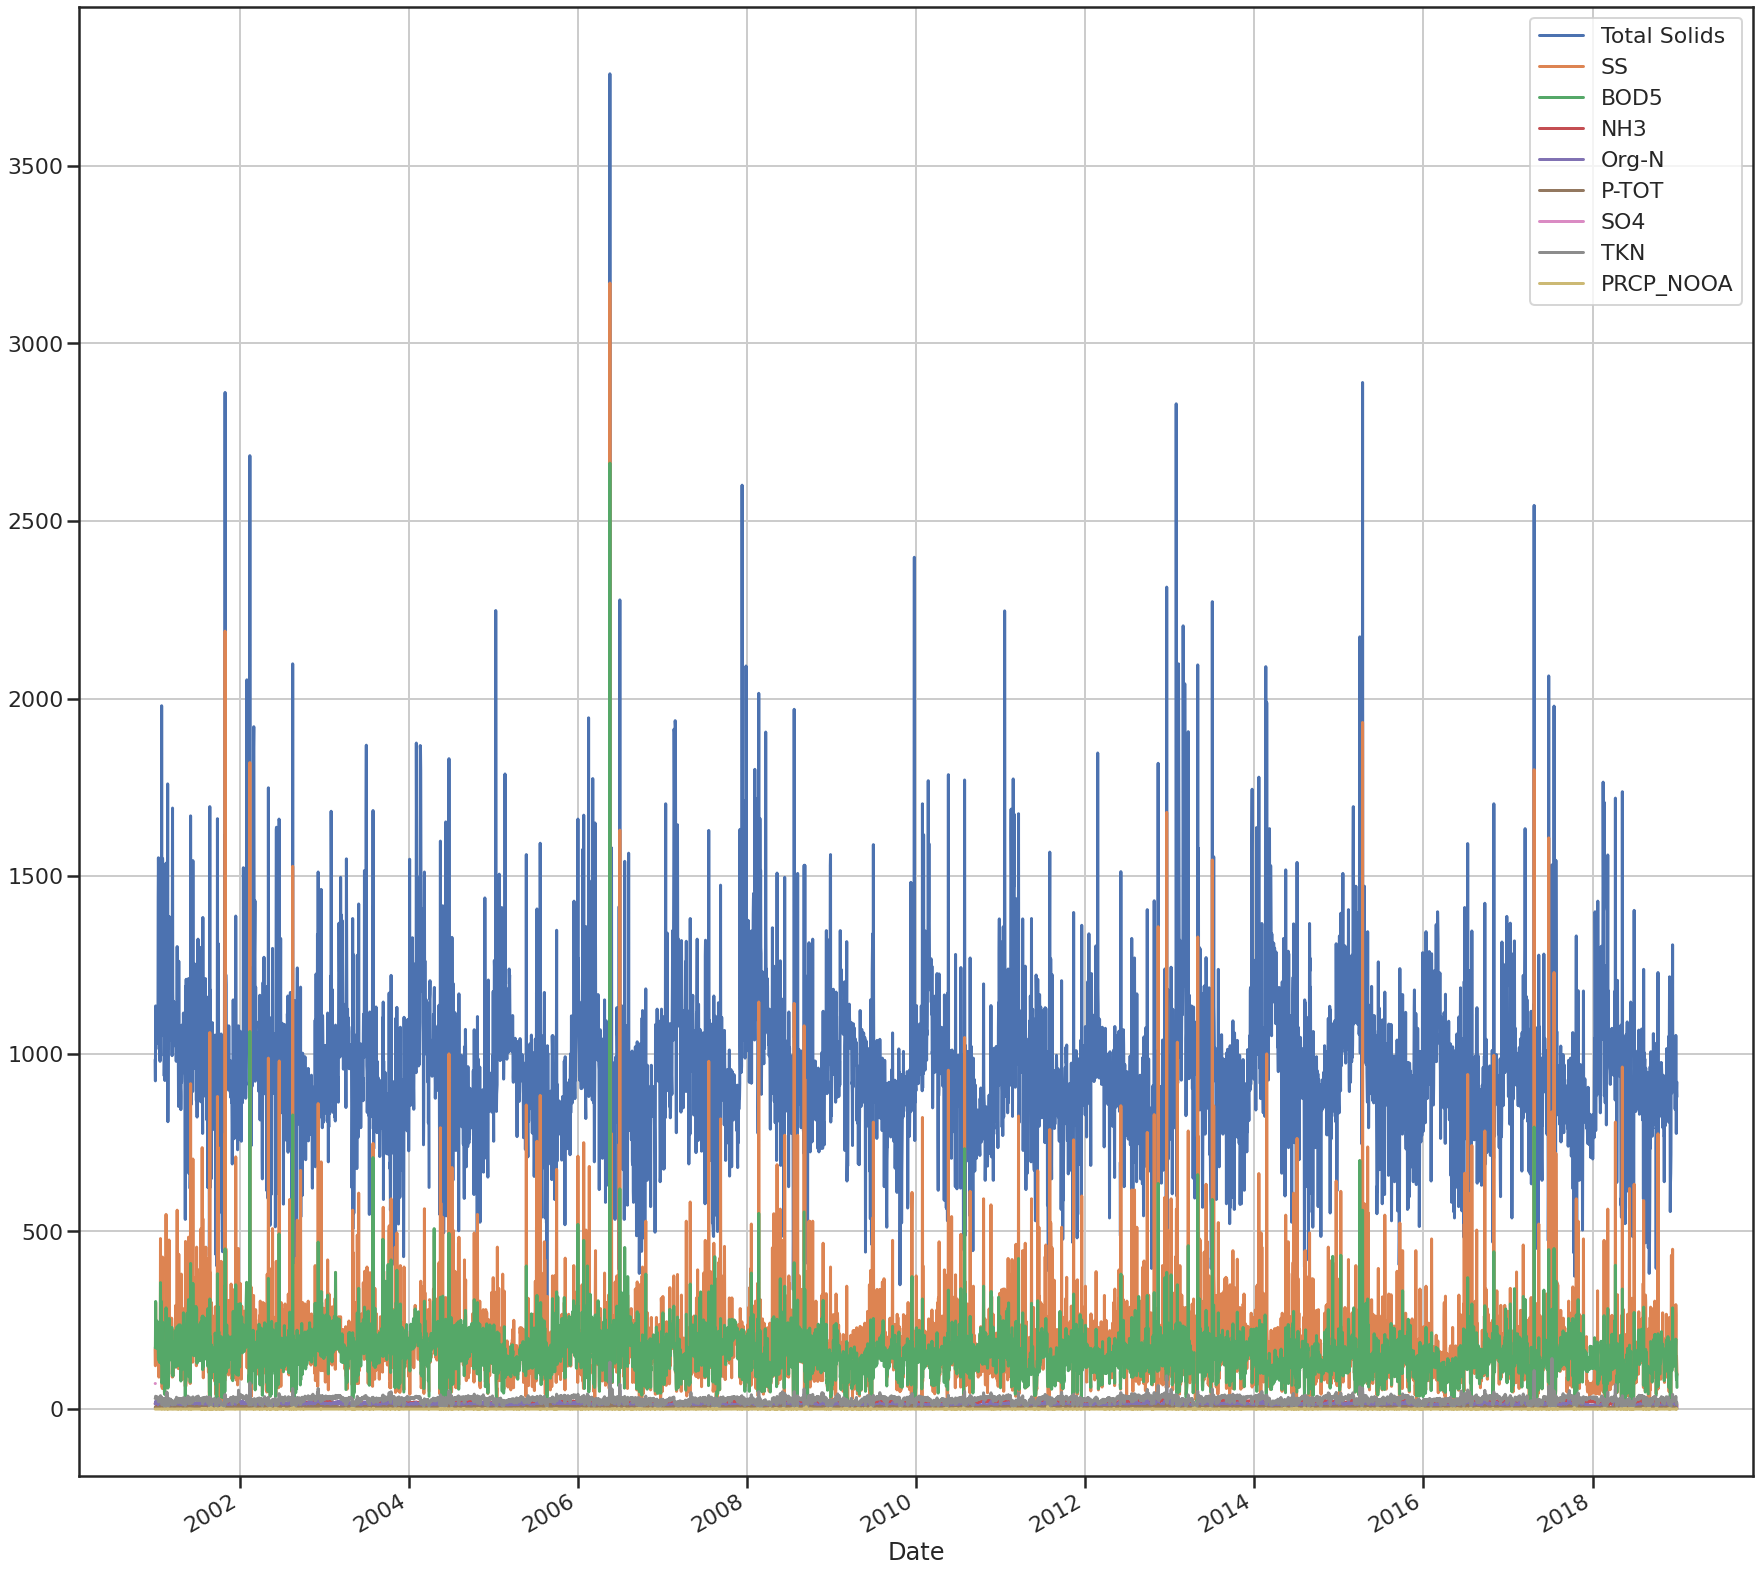

In [272]:
#plot all data
df.plot(figsize=(30, 30),grid=True)
plt.show()

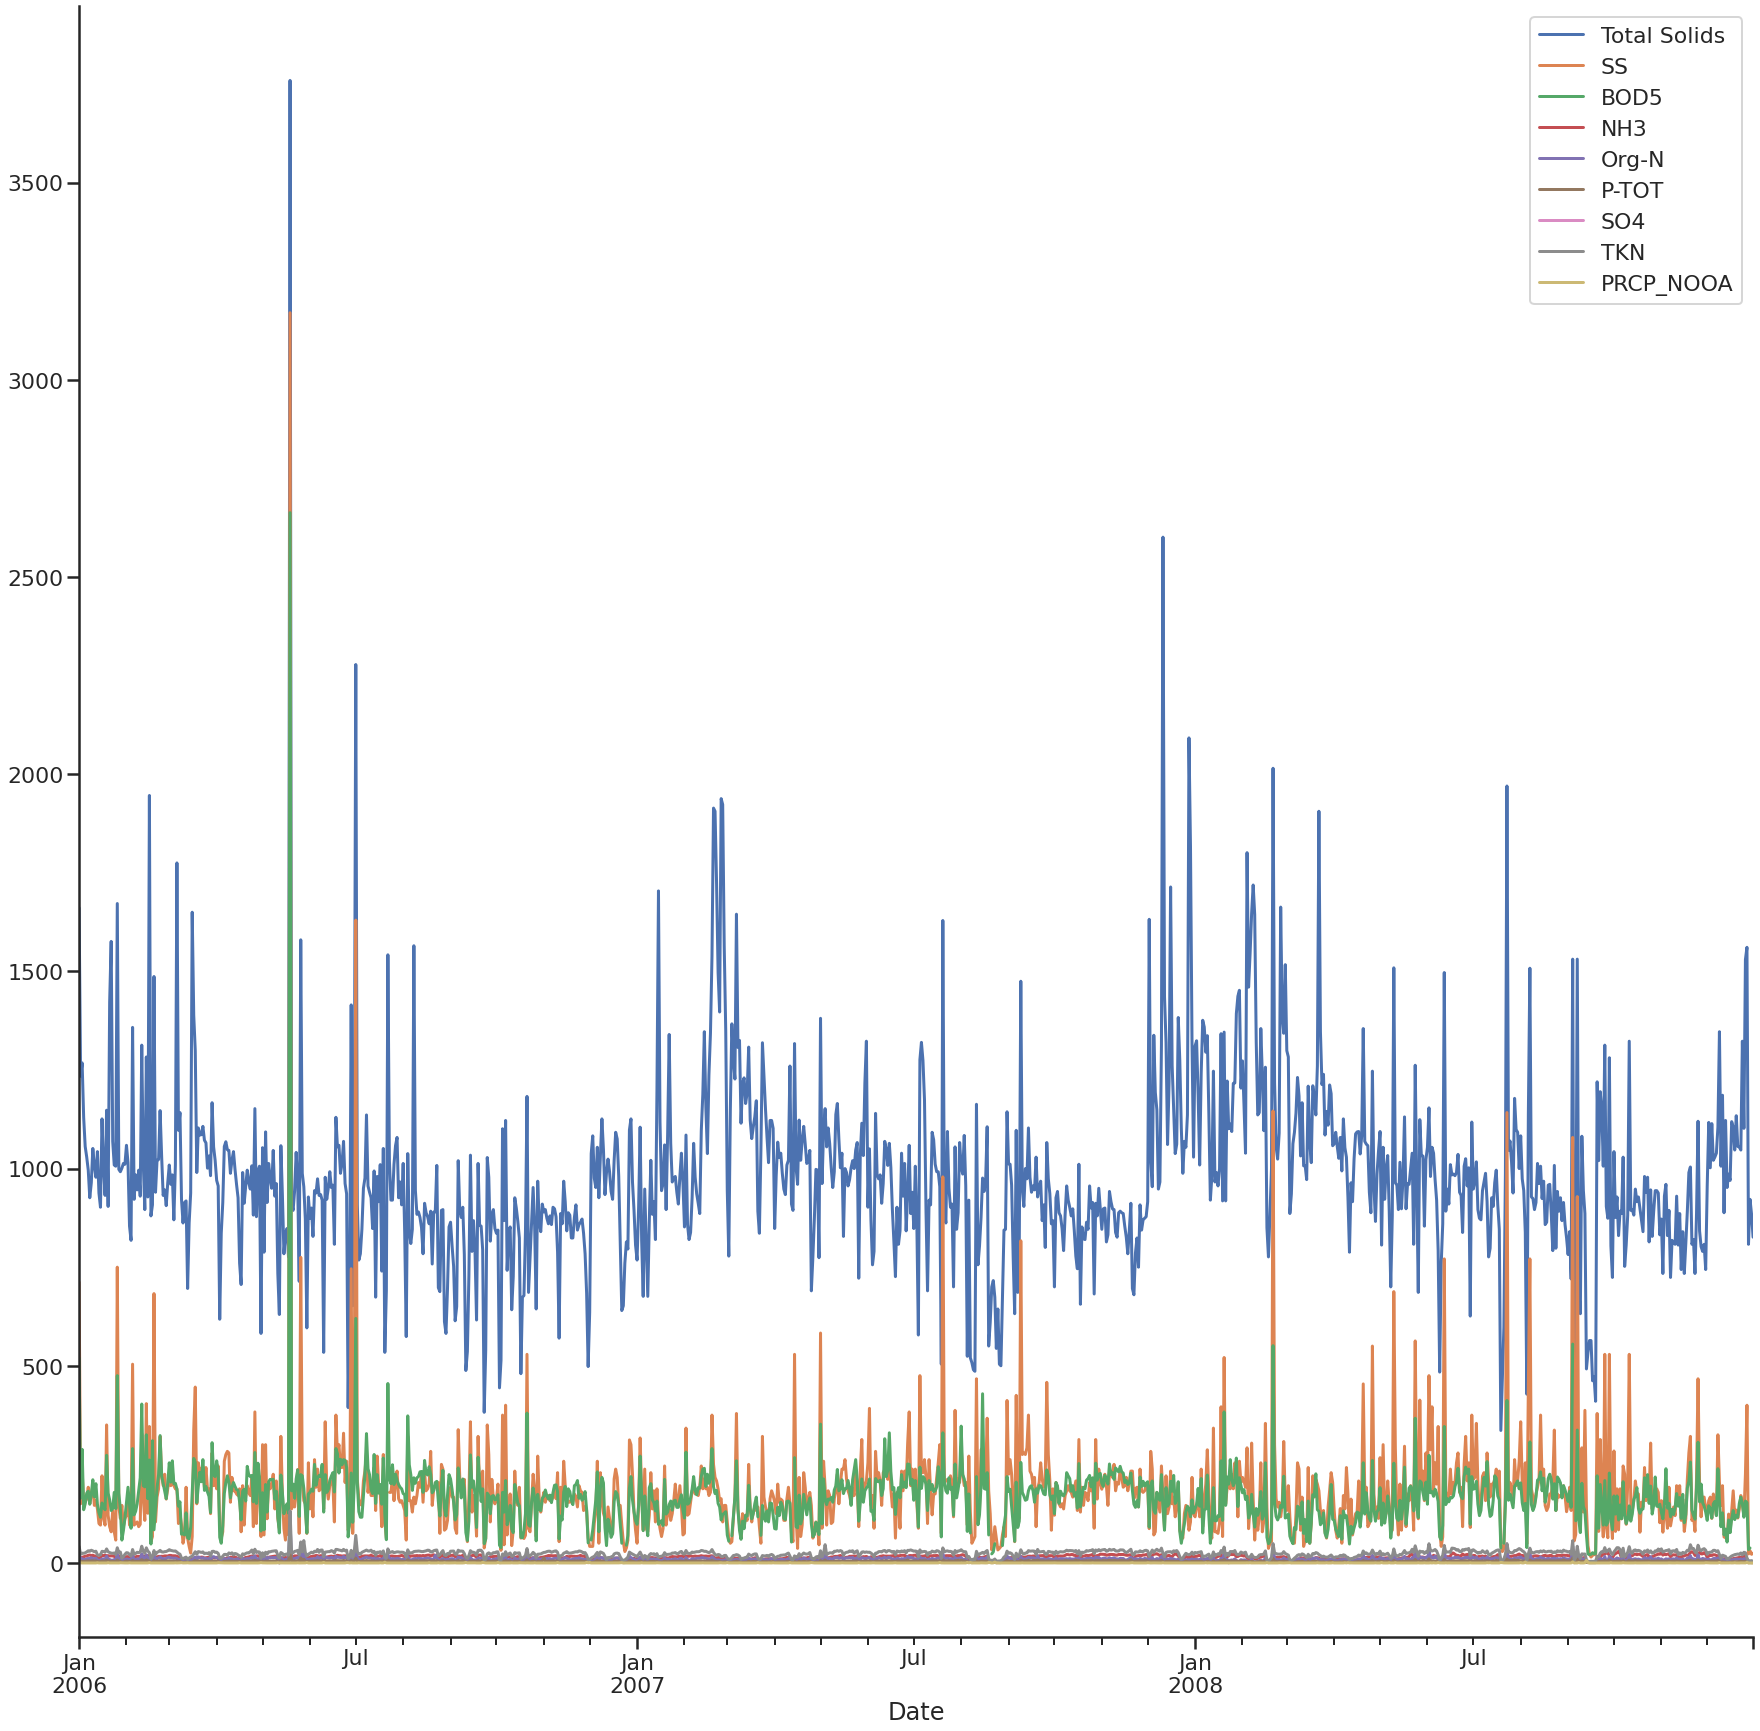

In [273]:
#select two year data and plot
oneyeardf = df.loc['2006':'2008']  
oneyeardf.plot(figsize=(30, 30))
sns.set(style='ticks', context='poster')
sns.despine()


In [274]:
df

,Total Solids,SS,BOD5,NH3,Org-N,P-TOT,SO4,TKN,PRCP_NOOA
Date,,,,,,,,,
2001-01-01,984.0,170.0,173.0,15.93,14.0,4.58,72.0,29.97,0.00
2001-01-02,924.0,122.0,174.0,15.52,14.4,4.52,72.0,29.96,0.00
2001-01-03,1135.0,300.0,303.0,14.19,21.9,6.06,NaN,36.11,0.00
2001-01-04,1013.0,192.0,228.0,15.43,19.4,5.33,NaN,34.83,0.00
2001-01-05,1088.0,226.0,210.0,14.77,19.3,5.41,NaN,34.06,0.00
...,...,...,...,...,...,...,...,...,...
2018-12-27,892.0,264.0,157.0,12.45,11.1,3.84,NaN,23.53,0.66
2018-12-28,776.0,104.0,94.0,10.61,6.2,1.97,NaN,16.76,0.08
2018-12-29,898.0,148.0,83.0,11.38,7.4,2.70,NaN,18.81,0.05


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fe5618e8ef0>,
      dtype=object)

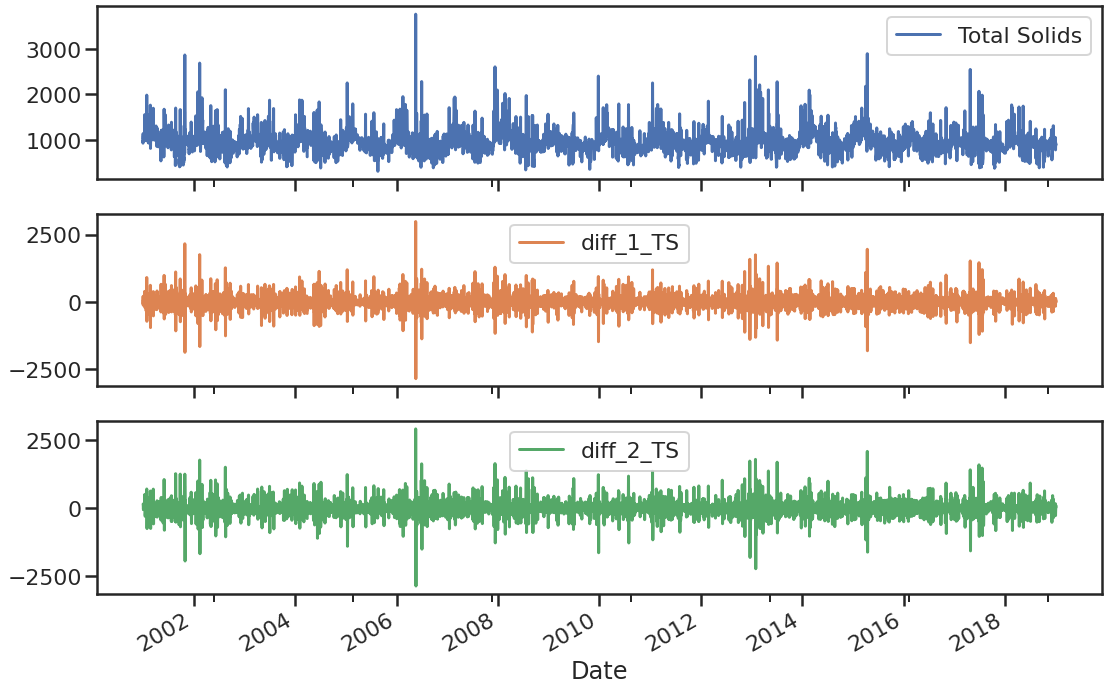

In [275]:
#check diff whether is it （平稳）stable？
df['diff_1_TS'] = df['Total Solids'].diff(1)
df['diff_2_TS'] = df['Total Solids'].diff(2)
df[['Total Solids', 'diff_1_TS', 'diff_2_TS']].plot(subplots=True, figsize=(18,12))

In [276]:
#one way to check is the data stable.
from statsmodels.tsa.stattools import adfuller
def test_ADF(series):
  dftest = adfuller(series, autolag='AIC')
  return dftest[1]
print(test_ADF(df['Total Solids'].dropna()))

7.918628139729594e-11


In [277]:
#t-test check the data smooth.
from statsmodels.stats.diagnostic import unitroot_adf
unitroot_adf(df['Total Solids'].dropna())

(-7.392816886712009,
 7.918628139729594e-11,
 29,
 6537,
 {'1%': -3.431350744944688,
  '10%': -2.5670054030454055,
  '5%': -2.8619822439398375},
 87071.54024066066)

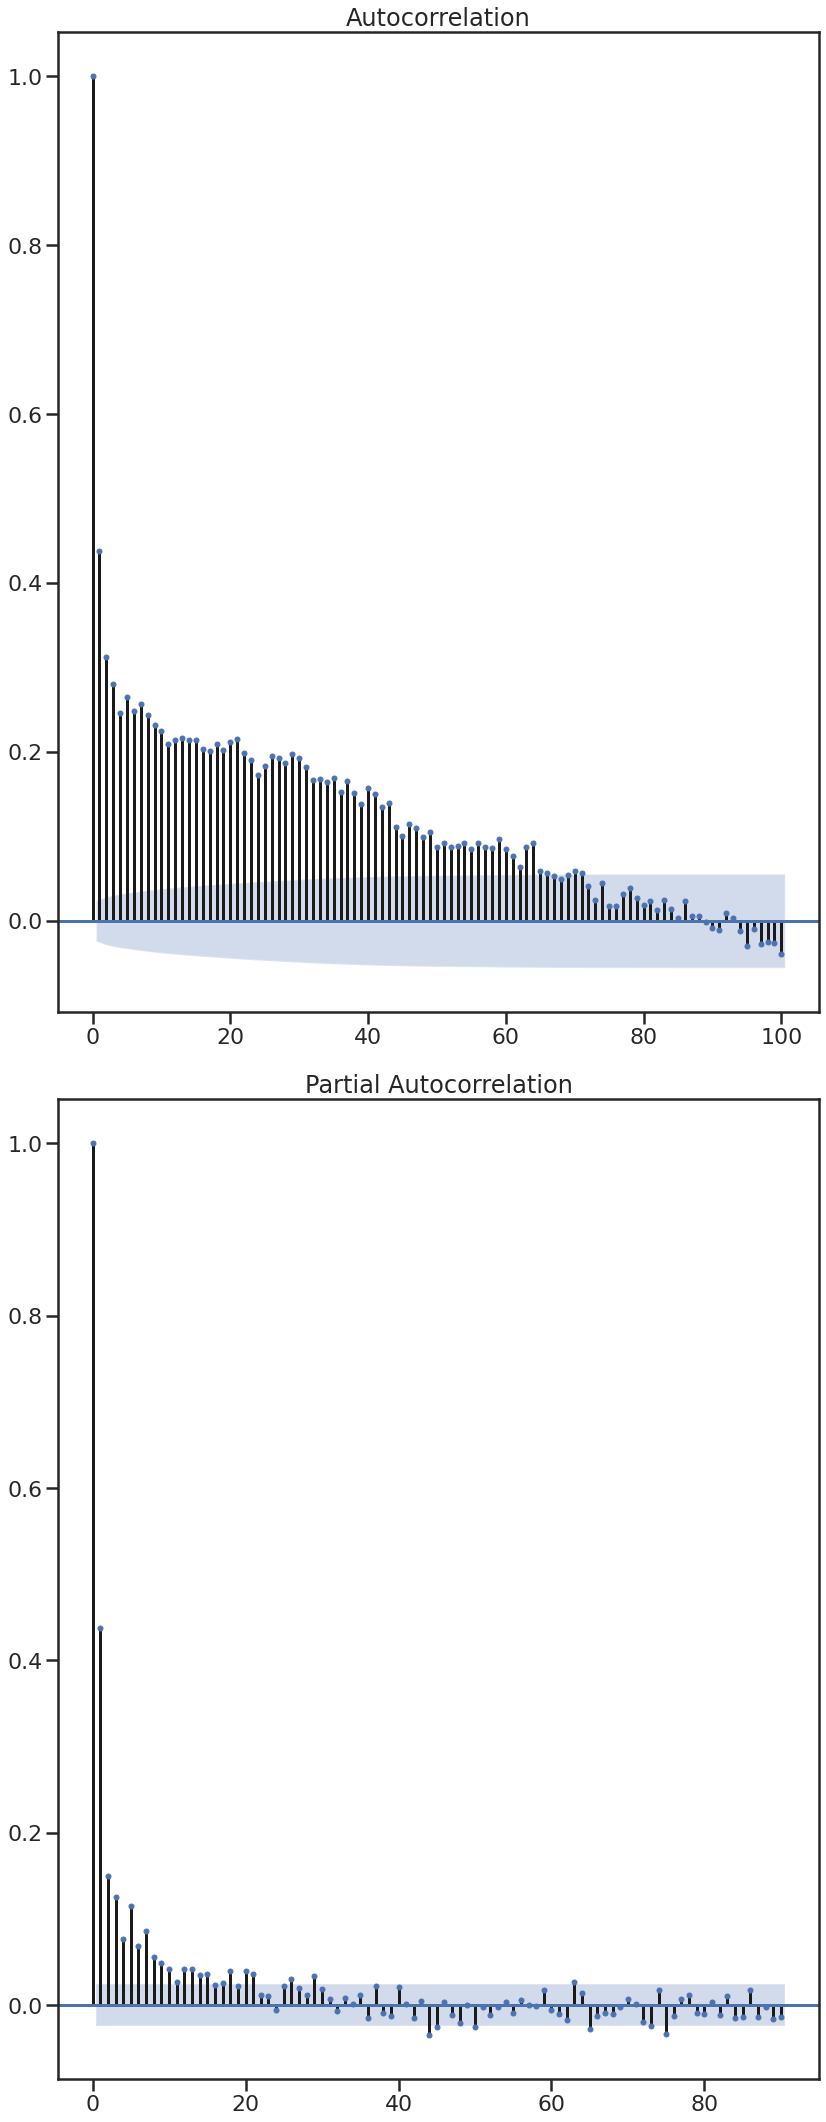

In [278]:
#draw ACF and PACF
#ACF sin and slow decrease
#PACF sharp 
#So I choice AR(1,0,0) AR(10,0,0) ARMA (1,0,62)
fig = plt.figure(figsize=(12,30))
ax1 = fig.add_subplot(211)
#sm.graphics.tsa.plot_acf(df['Total Solids'].dropna())
fig = sm.graphics.tsa.plot_acf(df['Total Solids'].dropna(), lags=100, ax=ax1)
ax1.xaxis.set_ticks_position('bottom')
fig.tight_layout();

ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df['Total Solids'].dropna(), lags=90, ax=ax2)
ax2.xaxis.set_ticks_position('bottom')
fig.tight_layout();

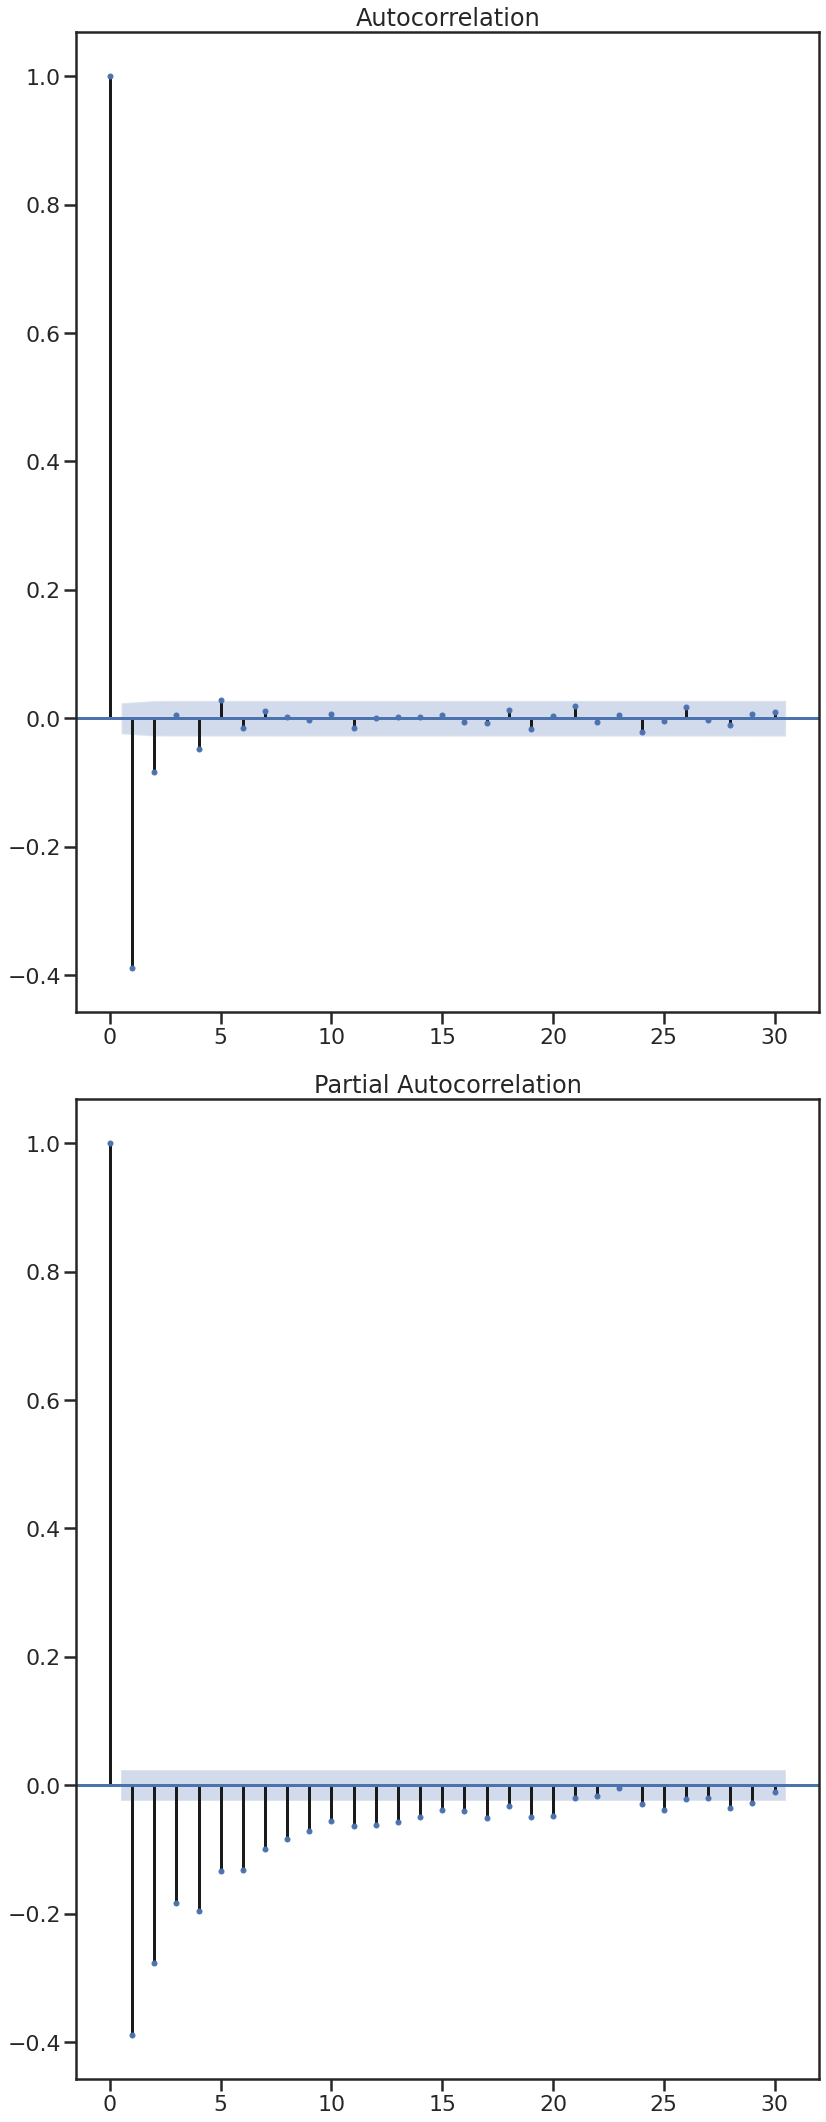

In [279]:
fig = plt.figure(figsize=(12,30))
ax1 = fig.add_subplot(211)
#sm.graphics.tsa.plot_acf(df['Total Solids'].dropna())
fig = sm.graphics.tsa.plot_acf(df['diff_1_TS'].dropna(), lags=30, ax=ax1)
ax1.xaxis.set_ticks_position('bottom')
fig.tight_layout();

ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df['diff_1_TS'].dropna(), lags=30, ax=ax2)
ax2.xaxis.set_ticks_position('bottom')
fig.tight_layout();

In [280]:
#divide data before 2017/3/14 train, after and include 2017/3/14 test.
df_TSolids = df['Total Solids']
n_sample = df_TSolids.shape[0]
n_TSolids_train = int(0.9*n_sample)
n_TSolids_forecast = n_sample - n_TSolids_train
TSolids_train = df_TSolids.iloc[:n_TSolids_train]
TSolids_test = df_TSolids.iloc[n_TSolids_train:]
#add period
TSolids_train.index = pd.DatetimeIndex(TSolids_train.index).to_period('D')
print(TSolids_train.shape)
print(TSolids_test.shape)
print(TSolids_train.tail())
print(TSolids_test.head())

(5916,)
(658,)
Date
2017-03-09     892.0
2017-03-10     980.0
2017-03-11     890.0
2017-03-12     836.0
2017-03-13    1200.0
Freq: D, Name: Total Solids, dtype: float64
Date
2017-03-14    1300.0
2017-03-15    1634.0
2017-03-16    1204.0
2017-03-17     930.0
2017-03-18     906.0
Name: Total Solids, dtype: float64


In [281]:
#train model

arima102_model = sm.tsa.ARIMA(TSolids_train.dropna(), order=(1,0,2)).fit(disp=False)
#print(arima1062_model.summary())

In [282]:
#train model
df.index = pd.DatetimeIndex(df.index).to_period('D')
arima100_model = sm.tsa.ARIMA(TSolids_train.dropna(), order=(1,0,0)).fit(disp=False)
print(arima100_model.summary())

                              ARMA Model Results                              
Dep. Variable:           Total Solids   No. Observations:                 5909
Model:                     ARMA(1, 0)   Log Likelihood              -39657.543
Method:                       css-mle   S.D. of innovations            198.825
Date:                Mon, 31 Aug 2020   AIC                          79321.087
Time:                        03:01:18   BIC                          79341.139
Sample:                    01-01-2001   HQIC                         79328.056
                         - 03-13-2017                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                962.7003      4.578    210.268      0.000     953.727     971.674
ar.L1.Total Solids     0.4351      0.012     37.153      0.000       0.412       0.458
                    

In [283]:
#model_result.save('/gdrive/My Drive/arima22065')

NormaltestResult(statistic=3359.33149861644, pvalue=0.0)


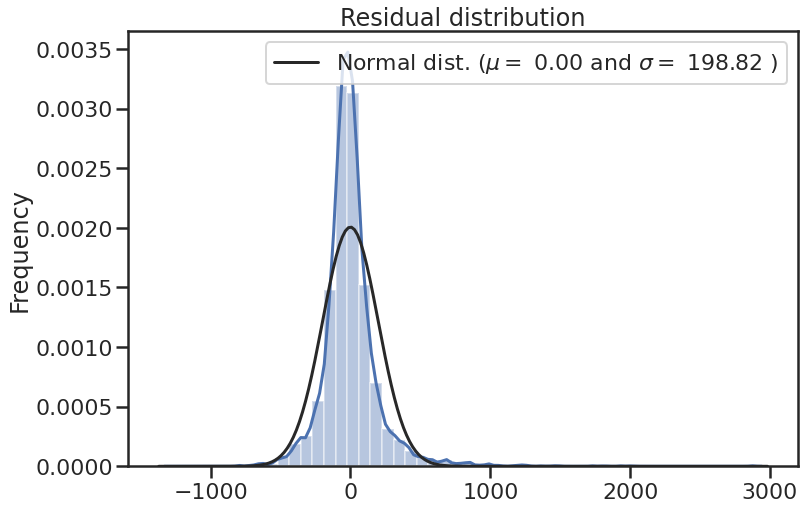

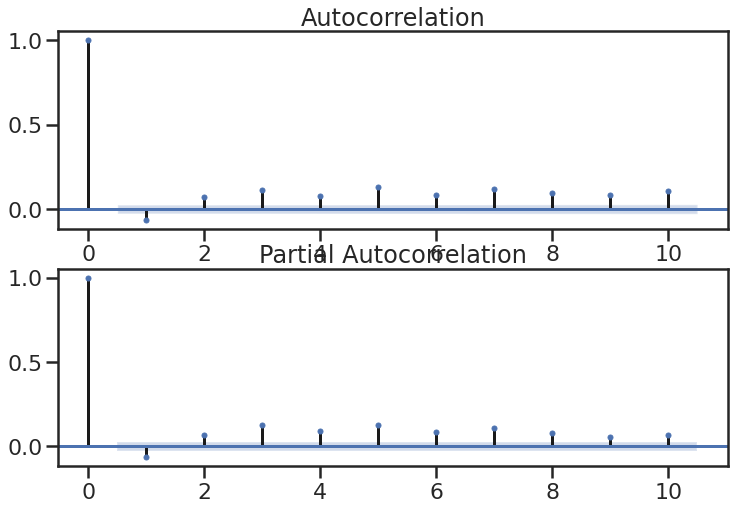

In [284]:
from scipy import stats
from scipy.stats import normaltest

resid = arima100_model.resid
print(normaltest(resid))
# returns a 2-tuple of the chi-squared statistic, and the associated p-value. the p-value is very small, meaning
# the residual is not a normal distribution

fig = plt.figure(figsize=(12,8))
ax0 = fig.add_subplot(111)

sns.distplot(resid ,fit = stats.norm, ax = ax0) # need to import scipy.stats

# Get the fitted parameters used by the function
(mu, sigma) = stats.norm.fit(resid)

#Now plot the distribution using 
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)], loc='best')
plt.ylabel('Frequency')
plt.title('Residual distribution')

# ACF and PACF
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(arima100_model.resid, lags=10, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(arima100_model.resid, lags=10, ax=ax2)

In [285]:
def smae_mae(y_true, y_pred):
  mae = np.mean(abs(y_true - y_pred) / y_true)
  smae = np.mean((np.abs(y_pred - y_true) * 2 / (np.abs(y_pred) + np.abs(y_true))).fillna(0))
  print("mae" + str(mae))
  print("Smae" + str(smae))

In [286]:
pred = arima100_model.predict("2017-03-13", "2017-03-20", dynamic= True)
print(pred["2017-03-10":"2017-03-20"])
y_true = df['Total Solids']["2017-03-10":"2017-03-20"]
print(y_true)
smae_mae(y_true["2017-03-10":"2017-03-20"], pred["2017-03-10":"2017-03-20"].values)


2017-03-10    960.723619
2017-03-11    961.840172
2017-03-12    962.326033
2017-03-13    962.537452
2017-03-14    962.629450
2017-03-15    962.669482
2017-03-16    962.686902
2017-03-17    962.694482
2017-03-18    962.697780
2017-03-19    962.699216
2017-03-20    962.699840
Freq: D, dtype: float64
Date
2017-03-10     980.0
2017-03-11     890.0
2017-03-12     836.0
2017-03-13    1200.0
2017-03-14    1300.0
2017-03-15    1634.0
2017-03-16    1204.0
2017-03-17     930.0
2017-03-18     906.0
2017-03-19     888.0
2017-03-20    1088.0
Freq: D, Name: Total Solids, dtype: float64
mae0.1470179268950923
Smae0.1630680047120025
